# Import and connect to google

In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Flatten 
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint,CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization, GaussianNoise,Input
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras import regularizers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn import metrics
import random 
import shutil
import glob, os
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load images 

In [ ]:
os.chdir("/content/drive/MyDrive/Final/Images/talking")
files =  glob.glob("*.jpg")
random.shuffle(files)

for f in files:
    p1 = f"/content/drive/MyDrive/Final/Images/talking/{f}"
    p2 = f"/content/drive/MyDrive/Final/Images/Test/talking/{f}"      
    shutil.move(p1, p2)    

In [ ]:
'''import random 
import glob, os
os.chdir("/content/drive/MyDrive/Final/Images/no_talking")
files =  glob.glob("*.jpg")
random.shuffle(files)
for f in files[:1969]:
  p1 = f"/content/drive/MyDrive/Final/Images/no_talking/{f}"
  p2 = f"/content/drive/MyDrive/Final/Images/Train/no_talking/{f}"
  p1 = p1.replace(' ','\ ')
  p2 = p1.replace(' ','\ ')
  !mv {p1} {p2}
'''


def Show(data_type="Train"):
    frequance = []
    for group in groups:                
        for base, dirs, files in os.walk(f"/content/drive/MyDrive/Final/Images/{data_type}/{group}"):
            frequance.append(len(files))        

    plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
    plt.bar(groups,frequance)
    plt.title(f'number of data for each group in {data_type}')
    plt.ylabel('Number of images')
    plt.xlabel('Group name')
    plt.show()

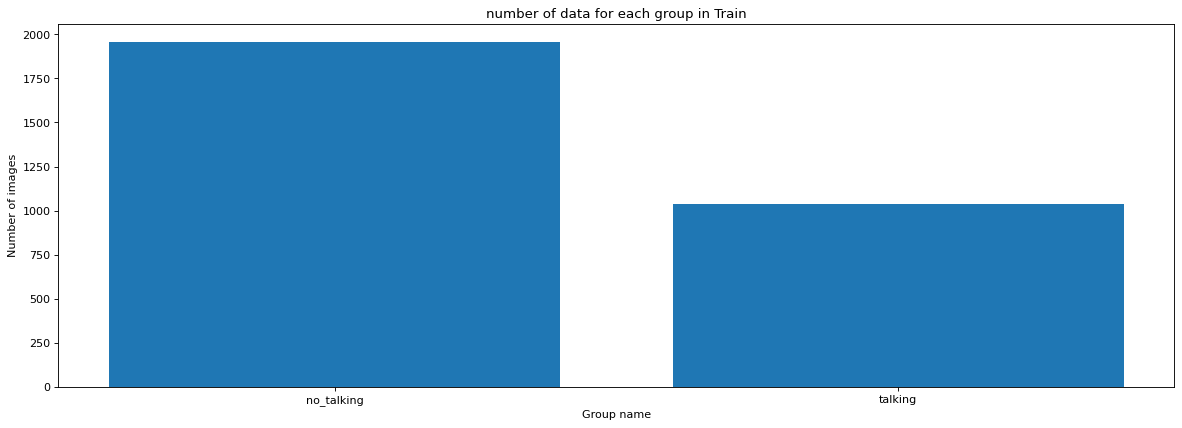

In [ ]:
Show("Train")

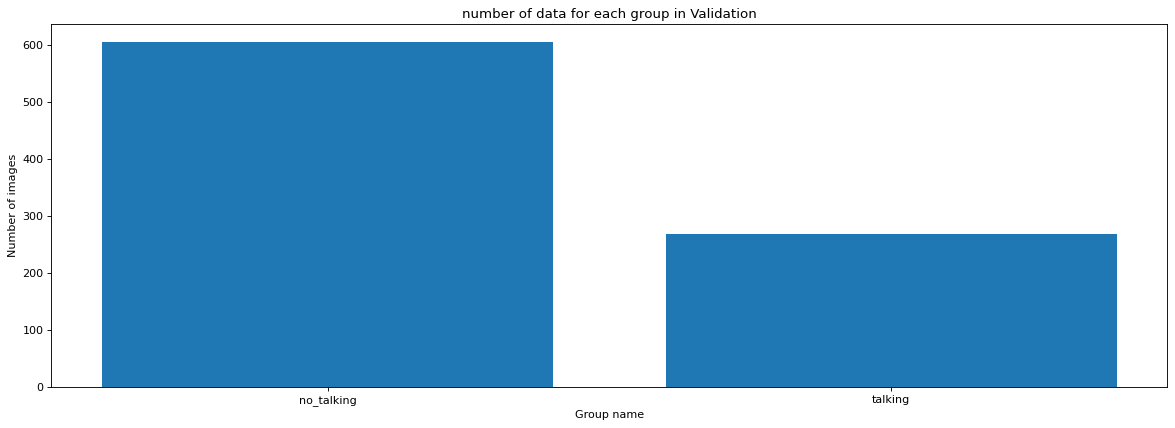

In [ ]:
Show("Validation")

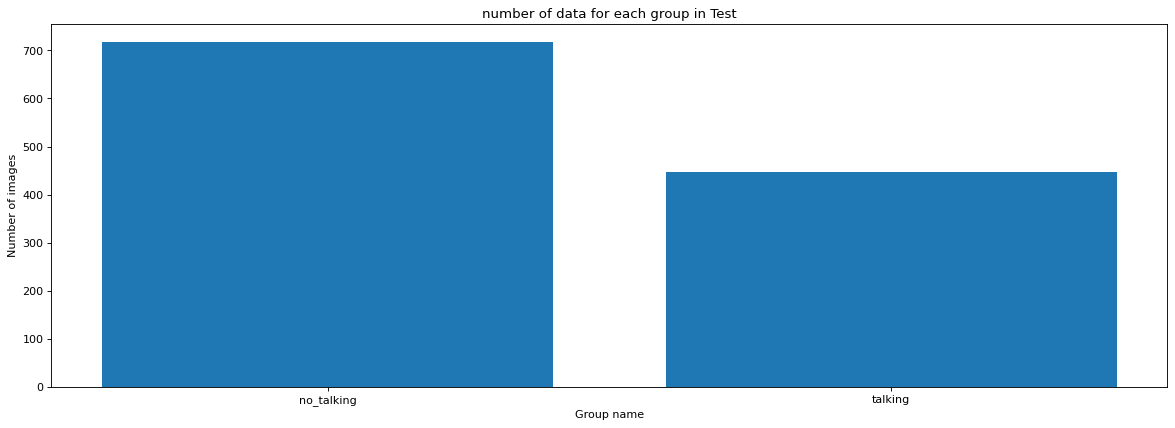

In [ ]:
Show("Test")

In [ ]:
groups = ['no_talking','talking']

In [ ]:
datasetUrl = "/content/drive/MyDrive/Final/Images"
target_size = (250,150)
batch_size = 16
num_classes = len(groups)     

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             featurewise_center=True,
                             samplewise_center=True,
                             featurewise_std_normalization=True,
                             samplewise_std_normalization=True,
                             zca_whitening=True,
                             zca_epsilon=1e-03,
                             rotation_range=0,
                             width_shift_range=0,
                             height_shift_range=0,
                             brightness_range=[1,1],
                             shear_range=1,
                             zoom_range=0,                             
                             fill_mode="nearest",
                             cval=0.5,
                             horizontal_flip=True,
                             vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        f'{datasetUrl}/Train', 
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes = groups )  # since we use binary_crossentropy loss, we need binary labels        

validation_generator = train_datagen.flow_from_directory(
        f'{datasetUrl}/Validation', 
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes = groups )  # since we use binary_crossentropy loss, we need binary labels 

test_datagen = ImageDataGenerator(rescale=1./255,
                                featurewise_center=True,
                                samplewise_center=True,
                                featurewise_std_normalization=True,
                                samplewise_std_normalization=True,)

test_generator = test_datagen.flow_from_directory(
        f'{datasetUrl}/Test', 
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes = groups )  # since we use binary_crossentropy loss, we need binary labels 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2994 images belonging to 2 classes.
Found 873 images belonging to 2 classes.
Found 1164 images belonging to 2 classes.


# Build network

In [ ]:
model = Sequential()
model.add(Input(shape=(*target_size,3)))
#model.add(GaussianNoise(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3) , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(32, activation='relu', 
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)))

model.add(Dense(16, activation='relu',
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 248, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 248, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 124, 74, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 72, 32)       9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 122, 72, 32)       128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 34, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train Model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit_generator(
        train_generator,        
        epochs=50,
        validation_data=validation_generator,
        callbacks=[es])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
188/188 [==============================] - 336s 2s/step - loss: 0.6009 - accuracy: 0.6790 - val_loss: 0.5811 - val_accuracy: 0.7090
Epoch 2/50
188/188 [==============================] - 77s 408ms/step - loss: 0.5591 - accuracy: 0.7084 - val_loss: 0.5249 - val_accuracy: 0.7251
Epoch 3/50
188/188 [==============================] - 76s 403ms/step - loss: 0.5486 - accuracy: 0.7134 - val_loss: 0.5023 - val_accuracy: 0.7377
Epoch 4/50
188/188 [==============================] - 76s 405ms/step - loss: 0.5441 - accuracy: 0.7258 - val_loss: 0.5446 - val_accuracy: 0.7342
Epoch 5/50
188/188 [==============================] - 76s 406ms/step - loss: 0.5193 - accuracy: 0.7375 - val_loss: 0.4785 - val_accuracy: 0.7721
Epoch 6/50
188/188 [==============================] - 79s 422ms/step - loss: 0.4915 - accuracy: 0.7629 - val_loss: 0.4462 - val_accuracy: 0.8007
Epoch 7/50
188/188 [==============================] - 78s 415ms/step - loss: 0.4619 - accuracy: 0.7816 - val_loss: 0.5533 - val_accu

In [ ]:
json.dump(str(history.history), open(f"/content/drive/MyDrive/Final/History.pkl", "w"))
model.save('/content/drive/MyDrive/Final/model.h5')

# **Assessment**

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Final/model.h5")
with open("/content/drive/MyDrive/Final/History.pkl",'r') as file:    
    history = eval(file.read().replace('"',"").replace("\'","'"))

## loss

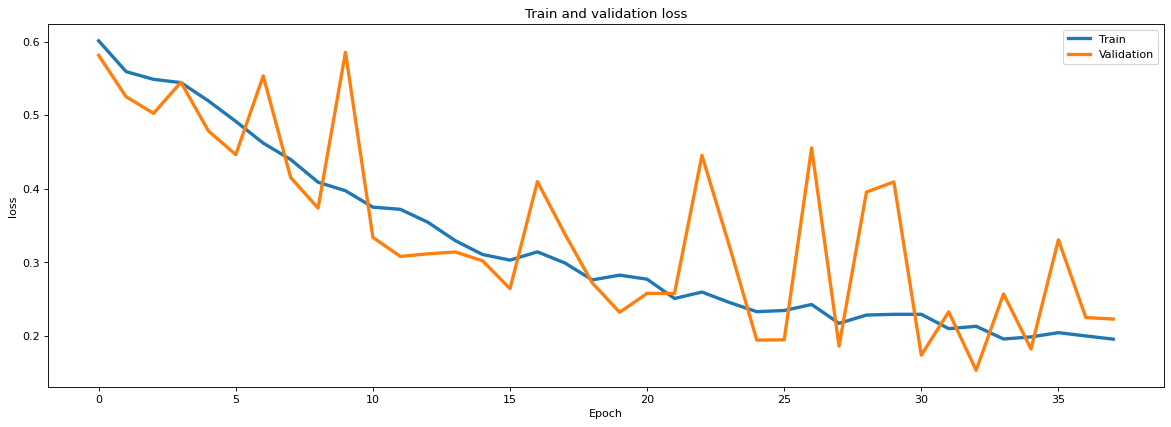

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history['loss'],linewidth=3)
plt.plot(history['val_loss'],linewidth=3)
plt.title(f'Train and validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## Accuracy

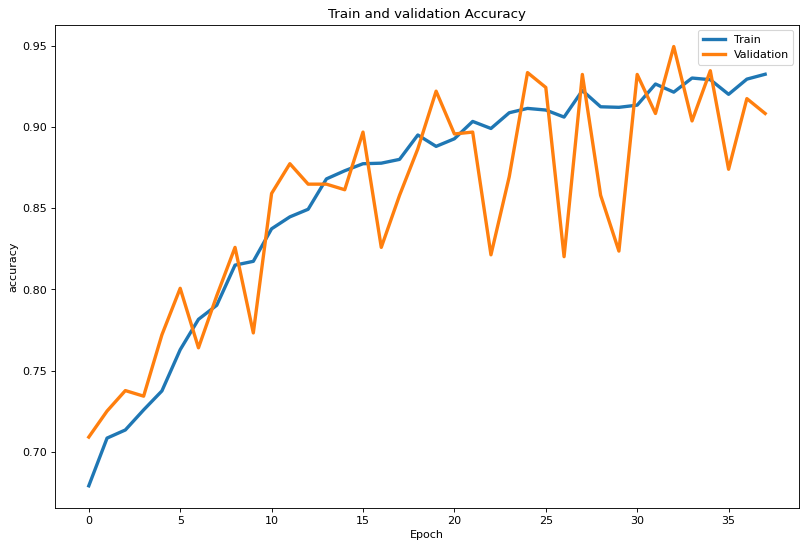

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(history['accuracy'],linewidth=3)
plt.plot(history['val_accuracy'],linewidth=3)
plt.title(f'Train and validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## **Confusion matrix for Test**

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


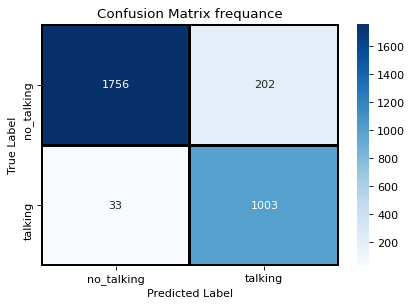

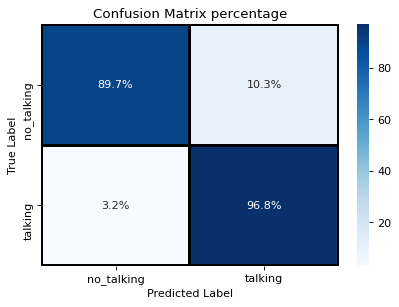

              precision    recall  f1-score   support

           0     0.9816    0.8968    0.9373      1958
           1     0.8324    0.9681    0.8951      1036

    accuracy                         0.9215      2994
   macro avg     0.9070    0.9325    0.9162      2994
weighted avg     0.9299    0.9215    0.9227      2994



In [ ]:
y_true = []
y_pred = []
for i in range(0,len(train_generator)):
    y_true = [*y_true, *[i for i in np.argmax(train_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(train_generator[i][0]),axis=1)]]        

matrix = metrics.confusion_matrix(y_true, y_pred)            
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')        
ax = sns.heatmap(matrix,cmap="Blues",linecolor='black',linewidths=1.7,xticklabels=groups, yticklabels=groups, annot=True,fmt="d")    
plt.title("Confusion Matrix frequance")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
sensitivity =  np.divide(matrix.transpose(),np.sum(matrix, axis=1)).transpose() * 100

plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')        
ax = sns.heatmap(sensitivity,cmap="Blues",linecolor='black',linewidths=1.7,xticklabels=groups, yticklabels=groups, annot=True,fmt=".1f")    
plt.title("Confusion Matrix percentage")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.show()
print(classification_report(y_true, y_pred,digits=4))

## **Confusion matrix for Test**

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


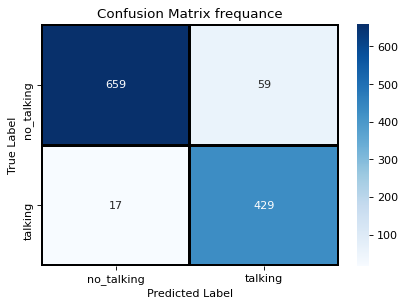

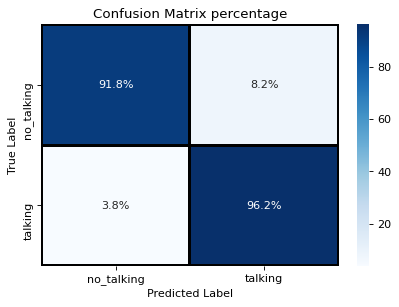

              precision    recall  f1-score   support

           0     0.9749    0.9178    0.9455       718
           1     0.8791    0.9619    0.9186       446

    accuracy                         0.9347      1164
   macro avg     0.9270    0.9399    0.9321      1164
weighted avg     0.9382    0.9347    0.9352      1164



In [ ]:
y_true = []
y_pred = []
for i in range(0,len(test_generator)):
    y_true = [*y_true, *[i for i in np.argmax(test_generator[i][1],axis=1)]]    
    y_pred = [*y_pred, *[i for i in np.argmax(model.predict_on_batch(test_generator[i][0]),axis=1)]]        

matrix = metrics.confusion_matrix(y_true, y_pred)            
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')        
ax = sns.heatmap(matrix,cmap="Blues",linecolor='black',linewidths=1.7,xticklabels=groups, yticklabels=groups, annot=True,fmt="d")    
plt.title("Confusion Matrix frequance")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
sensitivity =  np.divide(matrix.transpose(),np.sum(matrix, axis=1)).transpose() * 100

plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')        
ax = sns.heatmap(sensitivity,cmap="Blues",linecolor='black',linewidths=1.7,xticklabels=groups, yticklabels=groups, annot=True,fmt=".1f")    
plt.title("Confusion Matrix percentage")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.show()
print(classification_report(y_true, y_pred,digits=4))